# Task 5 : Exploratory Data Analysis - Sports
## Author : Roshan Aditya M

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches = pd.read_csv('/Users/roshanaditya/Downloads/TSF TASKS/Indian Premier League/matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [7]:
matches.rename(columns = {'wins_by_runs':'bat_1','win_by_wickets':'ball_1'}, inplace = True)

In [8]:
print("City in which most matches have been won: ",matches['city'].value_counts().idxmax()) 
print("Team that has won most matches: ",matches['winner'].value_counts().idxmax()) 
print("Player who has been man of the match most times: ",matches['player_of_match'].value_counts().idxmax()) 
print("Most frequent Umpire 1: " ,matches['umpire1'].value_counts().idxmax())
print("Most frequent Umpire 2: " ,matches['umpire2'].value_counts().idxmax())

City in which most matches have been won:  Mumbai
Team that has won most matches:  Mumbai Indians
Player who has been man of the match most times:  CH Gayle
Most frequent Umpire 1:  HDPK Dharmasena
Most frequent Umpire 2:  C Shamshuddin


In [9]:
matches['city'].fillna(value='Mumbai', inplace=True)
matches['winner'].fillna(value='Mumbai Indians', inplace=True)
matches['player_of_match'].fillna(value='CH Gayle', inplace=True)
matches['umpire1'].fillna(value='HDPK Dharmasena', inplace=True)
matches['umpire2'].fillna(value='C Shamshuddin', inplace=True)
matches['umpire3'].fillna(value='NA', inplace=True)

In [10]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
ball_1             0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [11]:
matches.duplicated().sum()

0

/Users/roshanaditya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


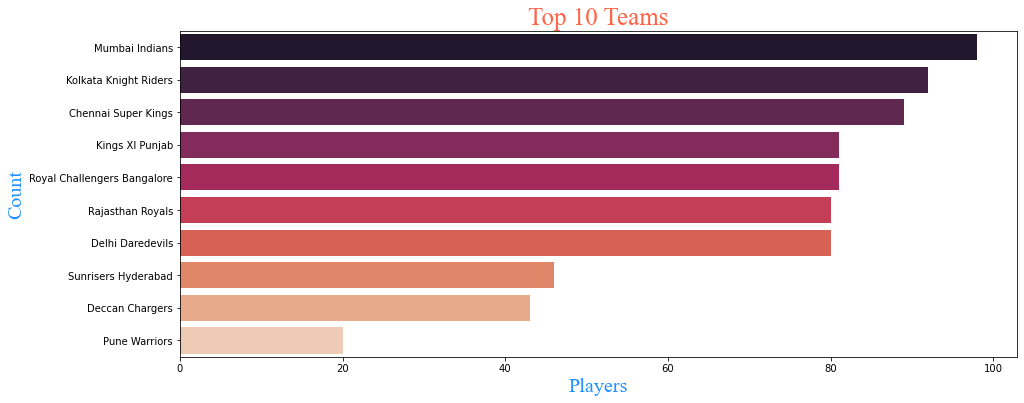

In [12]:
plt.figure(figsize=(15,6))
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
sns.barplot(matches['toss_winner'].value_counts()[:10].values, matches['toss_winner'].value_counts()[:10].index,palette='rocket')
plt.title('Top 10 Teams', fontdict=style1 )
plt.xlabel('Players' , fontdict=style2 )
plt.ylabel('Count', fontdict=style2 )
plt.show()

/Users/roshanaditya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


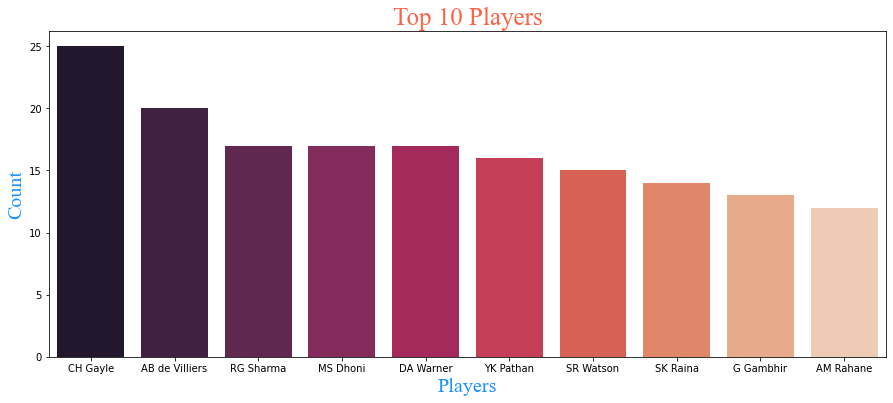

In [13]:
plt.subplots(figsize=(15,6))
style1  = {'family': 'Times New Roman', 'color': 'Tomato', 'size': 25}
style2  = {'family': 'Times New Roman', 'color': 'DodgerBlue', 'size': 20}
sns.barplot(matches['player_of_match'].value_counts()[:10].index, matches['player_of_match'].value_counts()[:10].values,palette='rocket')
plt.title('Top 10 Players', fontdict=style1 )
plt.xlabel('Players' , fontdict=style2 )
plt.ylabel('Count', fontdict=style2 )
plt.show()

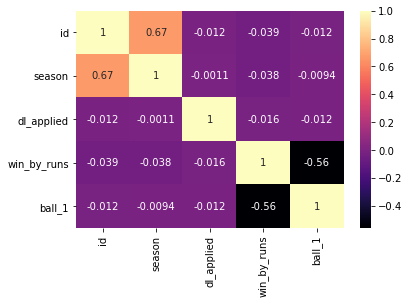

In [14]:
fac = sns.heatmap(matches.corr(), annot=True, cmap='magma')

In [21]:
matches = matches.drop(['dl_applied','season'],axis = 1)

/Users/roshanaditya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


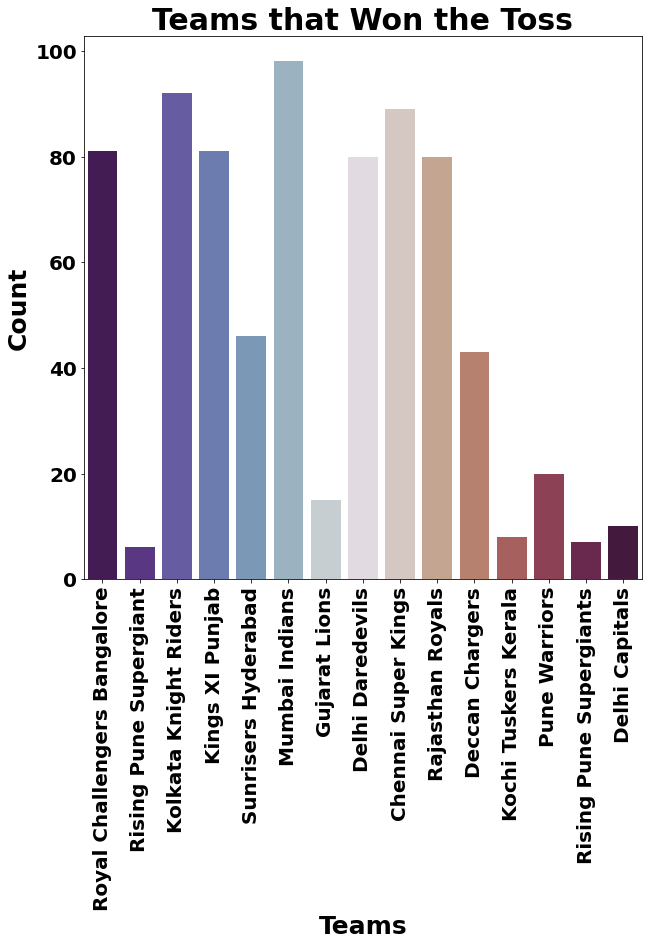

In [22]:
plt.figure(figsize=(10,10))

sns.countplot(matches['toss_winner'], data=matches, palette='twilight_shifted')

plt.xlabel('Teams', fontsize=25, fontweight='bold')
plt.ylabel('Count', fontsize=25, fontweight='bold')

plt.title('Teams that Won the Toss', fontweight="bold", size=30)

plt.xticks(rotation=90, fontweight="bold", size=20)
plt.yticks(fontweight="bold", size=20)

plt.show()

In [25]:
deli = pd.read_csv('/Users/roshanaditya/Downloads/TSF TASKS/Indian Premier League/deliveries.csv')

In [26]:
deli.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [27]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [28]:
deli.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [29]:
deli = deli.drop(['dismissal_kind','fielder'], axis=1)

In [30]:
delivery=pd.merge(deli, matches, left_on='match_id', right_on='id')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,win_by_runs,ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA


In [31]:
print('Shape: ',delivery.shape)
print('Size: ',delivery.size)

Shape:  (179078, 35)
Size:  6267730


In [33]:
delivery.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
id                       0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
winner                   0
win_by_runs              0
ball_1                   0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3                  0
dtype: int64

In [34]:
delivery['player_dismissed'].fillna(value='NA', inplace=True)
delivery.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
id                  0
city                0
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
winner              0
win_by_runs         0
ball_1              0
player_of_match     0
venue               0
umpire1             0
umpire2             0
umpire3             0
dtype: int64

In [35]:
delivery.duplicated().sum()

23

In [36]:
delivery.drop_duplicates()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,toss_decision,result,winner,win_by_runs,ball_1,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,bat,normal,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


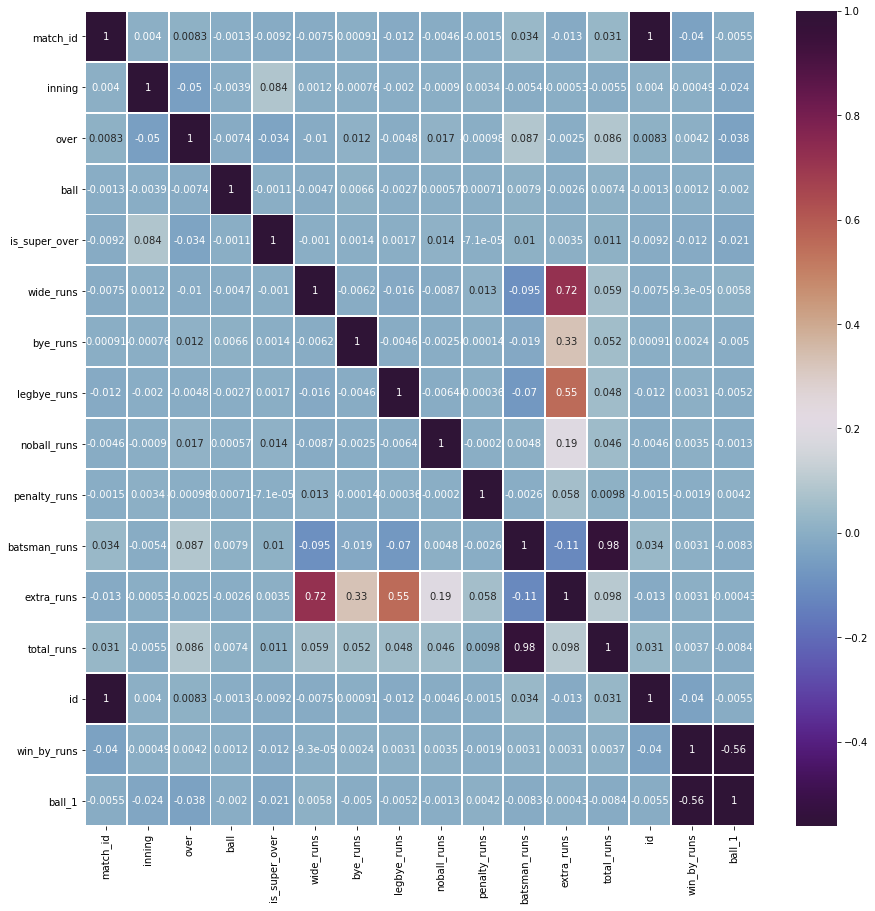

In [37]:
plt.figure(figsize=(15,15))
hm = sns.heatmap(delivery.corr(), annot=True, linewidth=1, cmap='twilight_shifted')

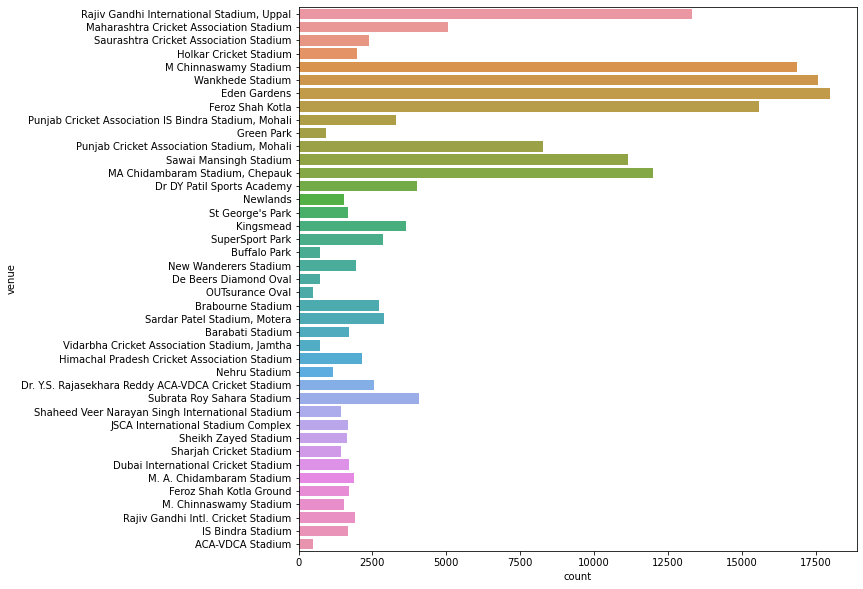

In [38]:
delivery.venue.value_counts()
plt.figure(figsize=(10,10))
sns.countplot(data=delivery, y='venue')
plt.show()

<AxesSubplot:>

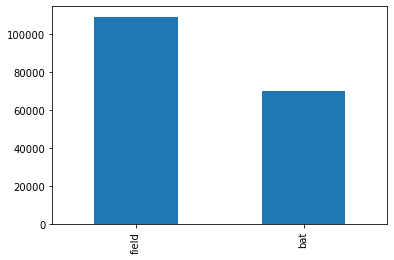

In [39]:
ts=delivery.toss_decision.value_counts().plot(kind='bar')
ts

/Users/roshanaditya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Toss Wins vs Victory')

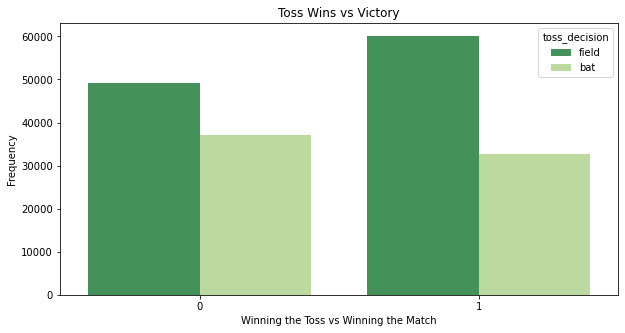

In [40]:
delivery['team_toss_win']=np.where((delivery.toss_winner==delivery.winner),1,0)
plt.figure(figsize=(10,5))
sns.countplot('team_toss_win', data=delivery, hue='toss_decision', palette='YlGn_r')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Victory")

Text(0.5, 1.0, 'Top 5 Batsmen')

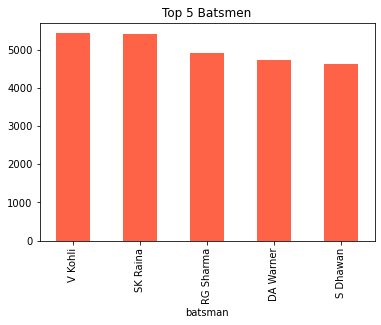

In [41]:
delivery.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head().plot(kind='bar', color='Tomato')
plt.title("Top 5 Batsmen")

Text(0.5, 1.0, 'Top 5 Bowlers')

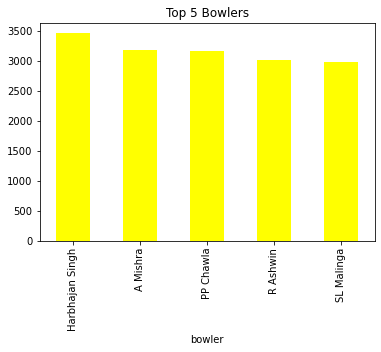

In [42]:
delivery.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(5).plot(kind='bar', color='yellow')
plt.title("Top 5 Bowlers")